Cho tập dữ liệu lưu các siêu liên kết (hyperlink) của các trang Web (file dữ liệu cung 
cấp trong trang elearning học phần)
- Với mỗi trang Web, đếm số liên kết chỉ đến nó.
- Với mỗi trang Web, liệt kê các các Web khác mà nó liên kết đến.
- Liệt kê top n trang Web được liên kết đến nhiều nhất.
- Vẽ đồ thị biểu diễn các siêu liên kết trong tập dữ liệu (gợi ý: sử dụng thư viện 
NetworkX)

In [1]:
from pyspark import SparkContext

# create Spark context with necessary configuration
sc = SparkContext("local", "Text processing with PySpark Example")

23/06/08 09:40:23 WARN Utils: Your hostname, hdoop-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/06/08 09:40:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/08 09:40:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import re
def is_tab_separated_numbers(s):
    try:
        a, b = s.split('\t')
        int(a)
        int(b)
        return (a, b)
    except ValueError:
        return None
     
lines = sc.textFile("/home/hdoop/labs/datasets/GoogleWebGraph")

lines = lines.map(is_tab_separated_numbers)
lines = lines.filter(lambda x: x != None).collect() 
print(len(lines))

5105039


In [3]:
from collections import defaultdict

in_nodes = defaultdict(list)
out_nodes = defaultdict(list)

for line in lines:
  node1, node2 = line
  out_nodes[node1].append(node2)
  in_nodes[node2].append(node1)

keys = list(out_nodes.keys()) + list(in_nodes.keys())
keys = sorted(set(keys))
result = []
for key in keys:
  result.append((key, len(in_nodes[key]), out_nodes[key]))

print(len(result))

875713


In [4]:
result[:20]

[('0', 212, ['11342', '824020', '867923', '891835']),
 ('1',
  6,
  ['53051',
   '203402',
   '223236',
   '276233',
   '552600',
   '569212',
   '635575',
   '748615',
   '862566',
   '893884']),
 ('10',
  13,
  ['49988',
   '85506',
   '129774',
   '134964',
   '181848',
   '194746',
   '310676',
   '332640',
   '393685',
   '556796',
   '826668']),
 ('1000', 0, ['890302', '902208']),
 ('10000', 10, ['245186', '392178', '424063', '896395', '903345', '904421']),
 ('100000', 0, ['847326', '891595']),
 ('100001', 0, ['915703']),
 ('100002', 1, ['406157', '751384', '799395']),
 ('100003', 1, ['514350', '855337']),
 ('100004', 1, []),
 ('100005', 1, ['68338']),
 ('100006', 0, ['722083']),
 ('100007', 1, []),
 ('100008',
  0,
  ['226332', '302607', '472008', '658140', '662465', '687271', '704423']),
 ('100009', 11, ['5005', '170289', '832797', '832910']),
 ('10001', 1, ['869092']),
 ('100010', 0, ['786843']),
 ('100012', 1, []),
 ('100013',
  0,
  ['85372',
   '286245',
   '287318',
   '50

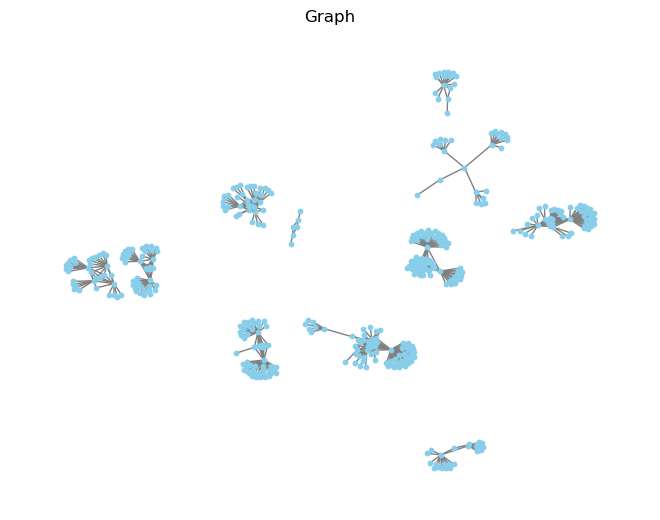

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G= nx.Graph()
G.add_edges_from(lines[:1000]) 

nx.draw(G, with_labels=False, node_color='skyblue', node_size=10, edge_color='gray')
plt.title("Graph")
plt.show()